In [30]:
!pip install requests

In [31]:
import requests
import json

In [32]:
url = "https://api.etherscan.io/api"

api_key = "Z6GDSB9V99URFAW9X9XVVT4FHQ2C4TQIAQ"

address = "0x9FC3da866e7DF3a1c57adE1a97c9f00a70f010c8"

payload = {
    "module": "account",
    "action": "txlist",
    "address": address,
    "startblock": 0,
    "endblock": 99999999,
    "sort": "asc",
    "apikey": api_key
}

response = requests.get(url, params=payload)

data = json.loads(response.content)

for transaction in data['result']:
    print(transaction)

{'blockNumber': '18626666', 'timeStamp': '1700648687', 'hash': '0xea74ed24ad4e9213126eeccd07ac02479fcb1cb4030d2eae0fd99ad840e16274', 'nonce': '7603919', 'blockHash': '0x7382544c324028dcff2d390bd15f718feeef6764338b99f7cffbb9c52553c4bc', 'transactionIndex': '146', 'from': '0xdfd5293d8e347dfe59e90efd55b2956a1343963d', 'to': '0x9fc3da866e7df3a1c57ade1a97c9f00a70f010c8', 'value': '1000000000000000000', 'gas': '207128', 'gasPrice': '24640382244', 'isError': '0', 'txreceipt_status': '1', 'input': '0x', 'contractAddress': '', 'cumulativeGasUsed': '12081277', 'gasUsed': '21000', 'confirmations': '484795', 'methodId': '0x', 'functionName': ''}
{'blockNumber': '18732135', 'timeStamp': '1701924503', 'hash': '0x38a8129d5c4b73ff6a9fe829831b8b35a74844da922d087c1f774268e822cda1', 'nonce': '0', 'blockHash': '0xbaf820177a39168c28568a0464ea560e7298cc49a4a23379079036181ac7381f', 'transactionIndex': '147', 'from': '0x9fc3da866e7df3a1c57ade1a97c9f00a70f010c8', 'to': '0xf135b9ed84e0ab08fdf03a744947cb089049bd

In [33]:
if data['result']:
    first_transaction = data['result'][0]

    print("Transaction Details:")
    print(f"Hash: {first_transaction['hash']}")
    print(f"Block Number: {first_transaction['blockNumber']}")
    print(f"From: {first_transaction['from']}")
    print(f"To: {first_transaction['to']}")
    print(f"Value: {first_transaction['value']} Wei")
    print(f"Gas Price: {first_transaction['gasPrice']} Wei")
    print(f"Gas Used: {first_transaction['gasUsed']}")
    print(f"Timestamp: {first_transaction['timeStamp']}")
else:
    print("No transactions found for the given address.")

Transaction Details:
Hash: 0xea74ed24ad4e9213126eeccd07ac02479fcb1cb4030d2eae0fd99ad840e16274
Block Number: 18626666
From: 0xdfd5293d8e347dfe59e90efd55b2956a1343963d
To: 0x9fc3da866e7df3a1c57ade1a97c9f00a70f010c8
Value: 1000000000000000000 Wei
Gas Price: 24640382244 Wei
Gas Used: 21000
Timestamp: 1700648687


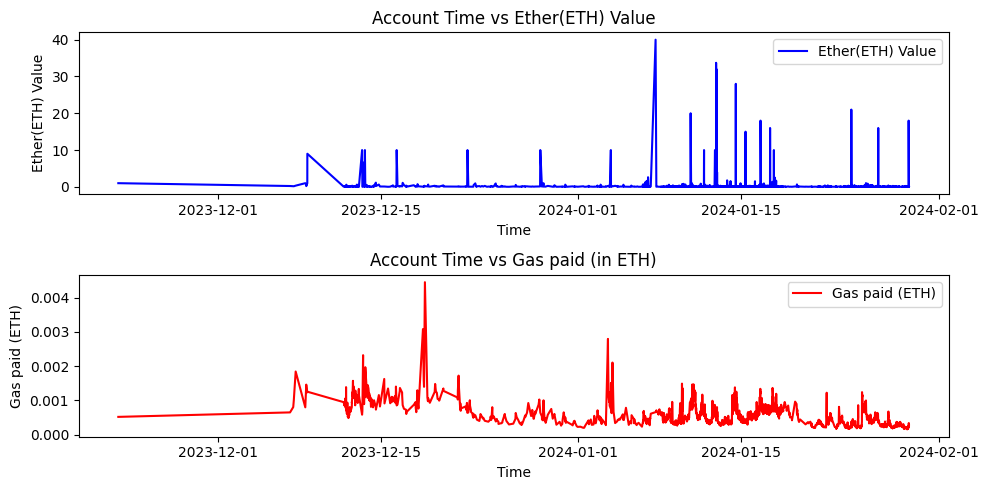

In [34]:
import matplotlib.pyplot as plt
from datetime import datetime

timestamps = [datetime.fromtimestamp(int(tx['timeStamp'])) for tx in data['result']]
eth_values = [float(tx['value']) / 1e18 for tx in data['result']]
gas_paid = [float(tx['gasPrice']) * float(tx['gasUsed']) / 1e18 for tx in data['result']]

# Plotting Account Time vs Ether(ETH) Value
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(timestamps, eth_values, label='Ether(ETH) Value', color='blue')
plt.title('Account Time vs Ether(ETH) Value')
plt.xlabel('Time')
plt.ylabel('Ether(ETH) Value')
plt.legend()

# Plotting Account Time vs Gas paid (in ETH)
plt.subplot(2, 1, 2)
plt.plot(timestamps, gas_paid, label='Gas paid (ETH)', color='red')
plt.title('Account Time vs Gas paid (in ETH)')
plt.xlabel('Time')
plt.ylabel('Gas paid (ETH)')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()